<a href="https://colab.research.google.com/github/Meghavarshineks/Occupancy-detection/blob/main/Room_Occupancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
import numpy as np 
import pandas as pd
import seaborn as s
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/content/gdrive/My Drive/file.csv")
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


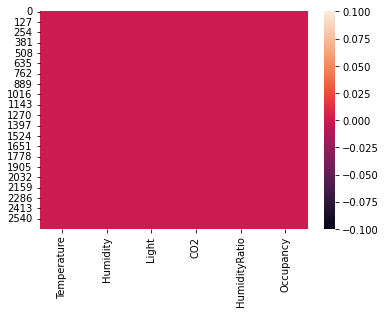

In [6]:
s.heatmap(df.isnull())

In [7]:
df.corr()['Occupancy']

Temperature      0.705784
Humidity         0.610764
Light            0.927949
CO2              0.768030
HumidityRatio    0.700330
Occupancy        1.000000
Name: Occupancy, dtype: float64

In [8]:
y=df['Occupancy']

In [9]:
x=df.drop(['Occupancy'],axis=1)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [12]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
score=accuracy_score(y_test,pred_y)

In [14]:
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_1=knn.predict(x_test)
    scores=accuracy_score(y_test,pred_1)
    list_1.append(scores)

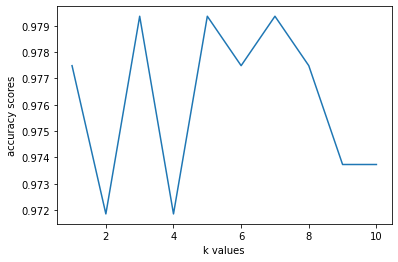

In [16]:
plt.plot(range(1,11),list_1)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [17]:
print(max(list_1))

0.9793621013133208


In [19]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)
score_2

0.9812382739212008

In [21]:
new_df=pd.DataFrame({'actual':y_test,
                    'predicted':pred_2})
new_df

,actual,predicted
1763,0,0
795,0,0
2099,0,0
104,1,1
1661,1,1
...,...,...
2321,0,0
564,0,0
2328,0,0
1109,1,1
